# EDA
- Loading the libraries and the data

In [1]:
import pandas as pd
import numpy as np
from DateTime import DateTime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pylab import rcParams
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")



- Function to do feature engineering over DatetimeIndex and have more information

In [2]:
def time_features(df: pd.DataFrame)-> pd.DataFrame:
    df['week']= df.index.dayofweek
    df['month']= df.index.month
    df['year']= df.index.year
    df['day_of_week']= df.index.day_name()
    df['quarter']= df.index.quarter
    return df

- Function to evaluate the increment or decrease in percentage
    

In [3]:
def time_change(df:pd.DataFrame)-> pd.DataFrame:
    df= df.groupby(df.index.year).agg({'Close/Last':'sum'}).astype(int)
    df.rename(columns={'Close/Last':'Value'},inplace=True)
    nuevo= df.iloc[:,0].tolist()
    empty_list= []
    for i in range(1,len(nuevo)):
        difference= (nuevo[i]-nuevo[i-1])/nuevo[i-1]*100
        empty_list.append(difference)
    if len(nuevo) != len(empty_list):
        df["change"]= [0]+empty_list
        df.change= df.change.astype(int)
    return df        

- Transformation of the data to begin the EDA
- For a matter of effiency, the analisis is going to be only with the Close/Last value
    - If it is necessary, the opening value is going to be added

In [4]:
df= pd.read_csv('../Data/apple.csv',sep=',',encoding='utf-8')                       # Reading the data
df= df[['Date','Close/Last']]                                                       # Only taking Date and Close values
df['Close/Last']=df['Close/Last'].str.replace('$','',regex=False).astype(float)     # Replacing the $ value
df['Date']= pd.to_datetime(df['Date'])                                              # To datetime
df.sort_values(by='Date',inplace=True)                                              
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.set_index('Date',inplace=True)

- in this Analysis, we can see the change in the value of the price in the last 10 years, the is a considerable change in the scale from 2021 and 2022, lets begin an analysis from 2014, later on iterate over that same proces from 2021,2022 an finally in 2023
We can see that there is a very considerable trend and pattern from 2023, later on we are going to analyze more of those points

- Visualization of all the values from 2014 to 2024

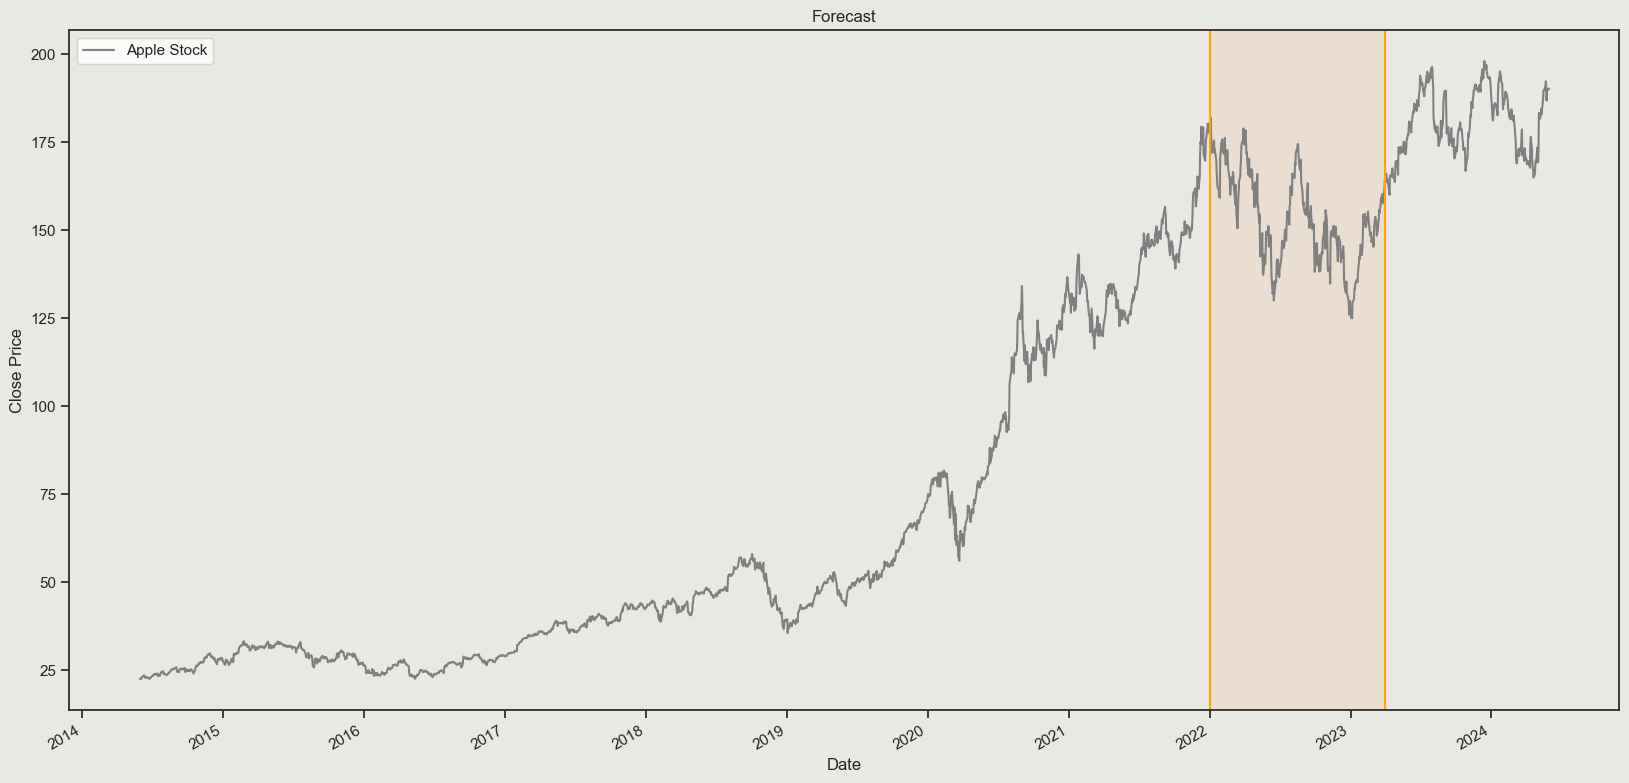

In [5]:
df["Close/Last"].plot(figsize=(20, 10), label="Apple Stock", color= "gray")
plt.axvline(x=pd.to_datetime('2022'),color='orange')
plt.axvline(x=pd.to_datetime('2023-04'),color='orange')
plt.axvspan(pd.to_datetime('2022'),pd.to_datetime('2023-04'),color='#FF8A36',alpha=0.1)

plt.title("Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.legend()
plt.show()


- The data shows different scales in values, with an 8x increase over the last 10 years, though not necessarily at a rate of 1x per year or following any specific trend.
- TThere is an increase in the variations of the Close value from 2020 onwards, with an increasing trend.
- There is a clear pattern between 2022-2023; further analysis will be conducted.

- The scale of the Values are way to different from 2014 to 2020, the analysis is going to be made from 2020-2024 so we can have a more accurate understanding of the actual value
- The horizontal line in the Y axis represents the break in the AVG price of the close value, it is not specific, is just a mere visual help to see the change of the scale

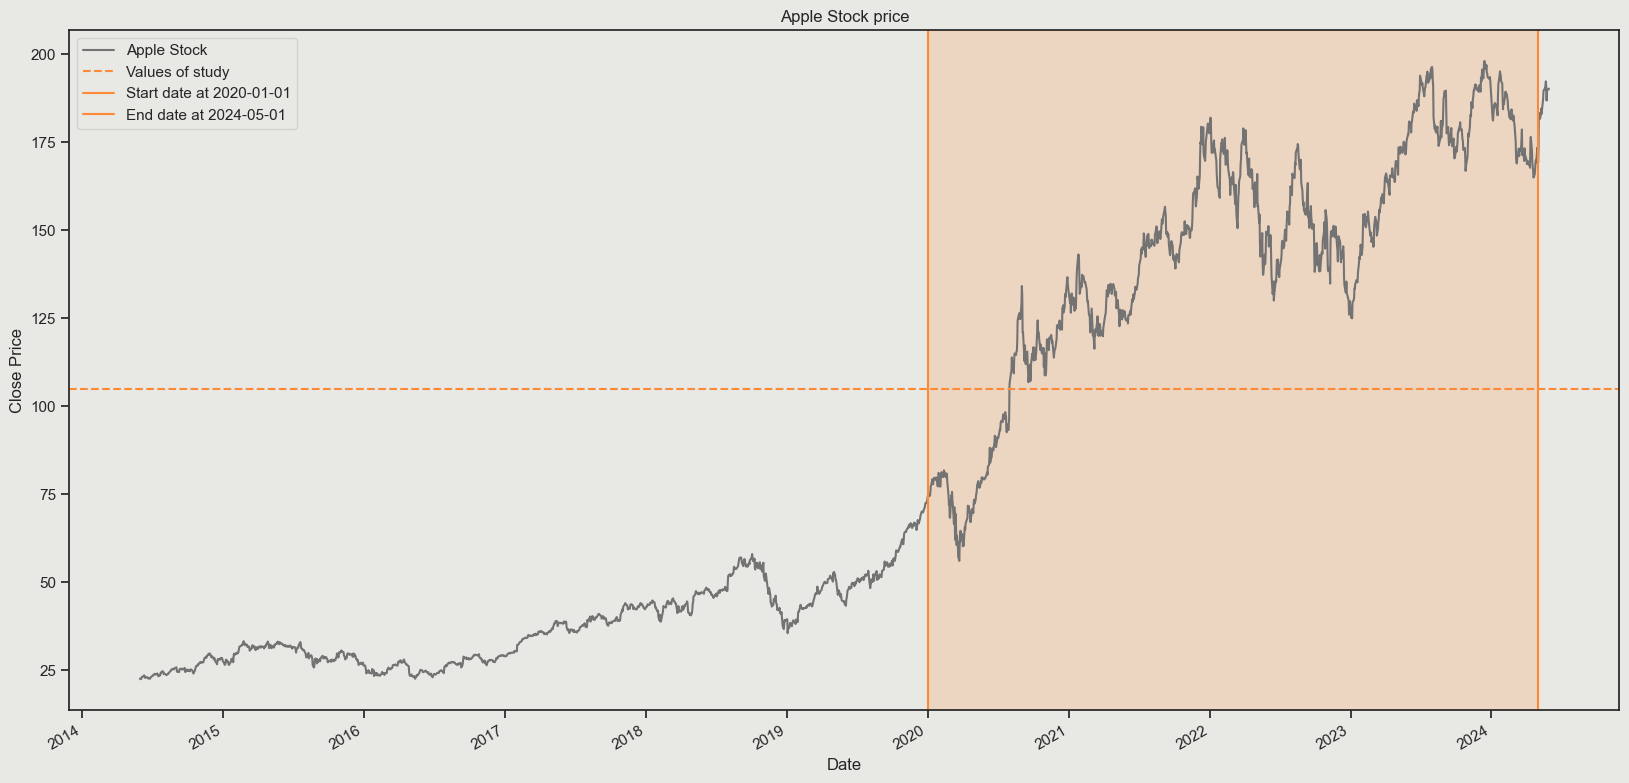

In [6]:
df["Close/Last"].plot(figsize=(20, 10), label="Apple Stock", color= "#737373")                                      # Selection of data
plt.axhline(y=105, color='#FF8A36', linestyle='--', label='Values of study')
#plt.axhspan(105, 170, color='orange', alpha=0.1)  

plt.axvline(x=pd.to_datetime('2020-01-01'), color='#FF8A36', linestyle='-', label='Start date at 2020-01-01')
plt.axvline(x=pd.to_datetime('2024-05-01'), color='#FF8A36', linestyle='-', label='End date at 2024-05-01')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-05-01'), color='#FF8A36', alpha=0.2)

plt.title("Apple Stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().set_facecolor('#E8E8E4')  
plt.gcf().set_facecolor('#E8E8E4')
plt.legend(facecolor='#E8E8E4')
plt.show()

- Slicing by DatetimeIndex 2020-2025-05-01

In [7]:
data= df.loc['2020':'2024-05-01'].copy()


- Renaming of the column for simplicity

In [8]:
data.rename(columns={"Close/Last":"Value"},inplace=True)

- Visualization of the data

In [9]:
print(data.head(2))
print(data.tail(2))

              Value
Date               
2020-01-02  75.0875
2020-01-03  74.3575
             Value
Date              
2024-04-30  170.33
2024-05-01  169.30


- Lowest price of "Value" in the historical data from 2020-2024

In [10]:
minimmum= data["Value"].idxmin()
min_value= data.loc[minimmum]
print(min_value)
print(minimmum.day_name())

Value    56.0925
Name: 2020-03-23 00:00:00, dtype: float64
Monday


- Moment where the Vale got at is highest

In [11]:
max_value= data["Value"].idxmax()
max_observation= data.loc[max_value]
print(max_observation)
print(max_value.day_name())

Value    198.11
Name: 2023-12-14 00:00:00, dtype: float64
Thursday


- Windows to analyze the charasteristics of the growth
    - It can be really important to have more information about the relationship of the growth of this data with some sort of external input or sensitivity
    - Further analysis will be conducted regarding news related to this dates
        - After some research, it is really difficult to gather accurate information on the internet about these kind of companies with a 4 years delay, for future explorations from 2024, news sensitivity will be implemented

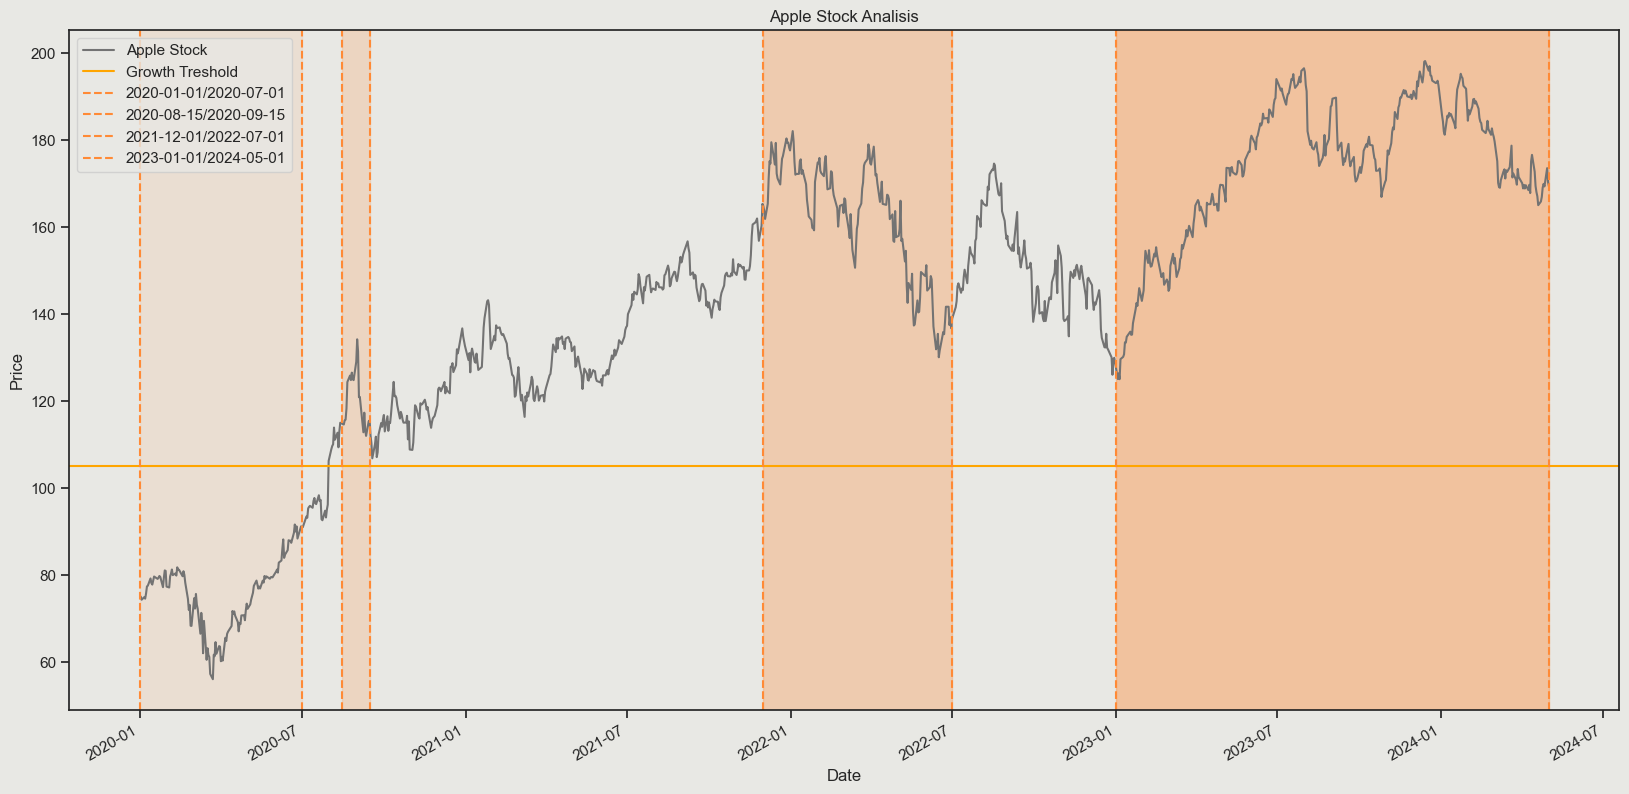

In [12]:

data["Value"].plot(figsize=(20,10),label="Apple Stock",color="#737373")
plt.axhline(y=105, color="orange", linestyle="-",label="Growth Treshold")

plt.axvline(x=pd.to_datetime("2020-01-01"),color="#FF8A36",linestyle="--",label="2020-01-01/2020-07-01")
plt.axvline(x=pd.to_datetime("2020-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01"),color="#FF8A36",alpha=0.1)


plt.axvline(x=pd.to_datetime("2020-08-15"),color="#FF8A36",linestyle="--",label="2020-08-15/2020-09-15")
plt.axvline(x=pd.to_datetime("2020-09-15"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2020-08-15"),pd.to_datetime("2020-09-15"),color="#FF8A36",alpha=0.2)

plt.axvline(x=pd.to_datetime("2021-12-01"),color="#FF8A36",linestyle="--",label="2021-12-01/2022-07-01")
plt.axvline(x=pd.to_datetime("2022-07-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2021-12-01"),pd.to_datetime("2022-07-01"),color="#FF8A36",alpha=0.3)

plt.axvline(x=pd.to_datetime("2023-01-01"),color="#FF8A36",linestyle="--",label="2023-01-01/2024-05-01")
plt.axvline(x=pd.to_datetime("2024-05-01"),color="#FF8A36",linestyle="--")
plt.axvspan(pd.to_datetime("2023-01-01"),pd.to_datetime("2024-05-01"),color="#FF8A36",alpha=0.4)


plt.title("Apple Stock Analisis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(facecolor="#E8E8E4")
plt.show()

- Analysis of increment/decrease per year

In [13]:
df= time_change(df)

- The formula has created the "change" feature where we can see the percentage change in the value of the value

In [14]:
df.head()

,Value,change
Date,,
2014,3816,0
2015,7562,98
2016,6590,-12
2017,9447,43
2018,11863,25


- Bars showing the change in the values over the years, clear measurements of performance

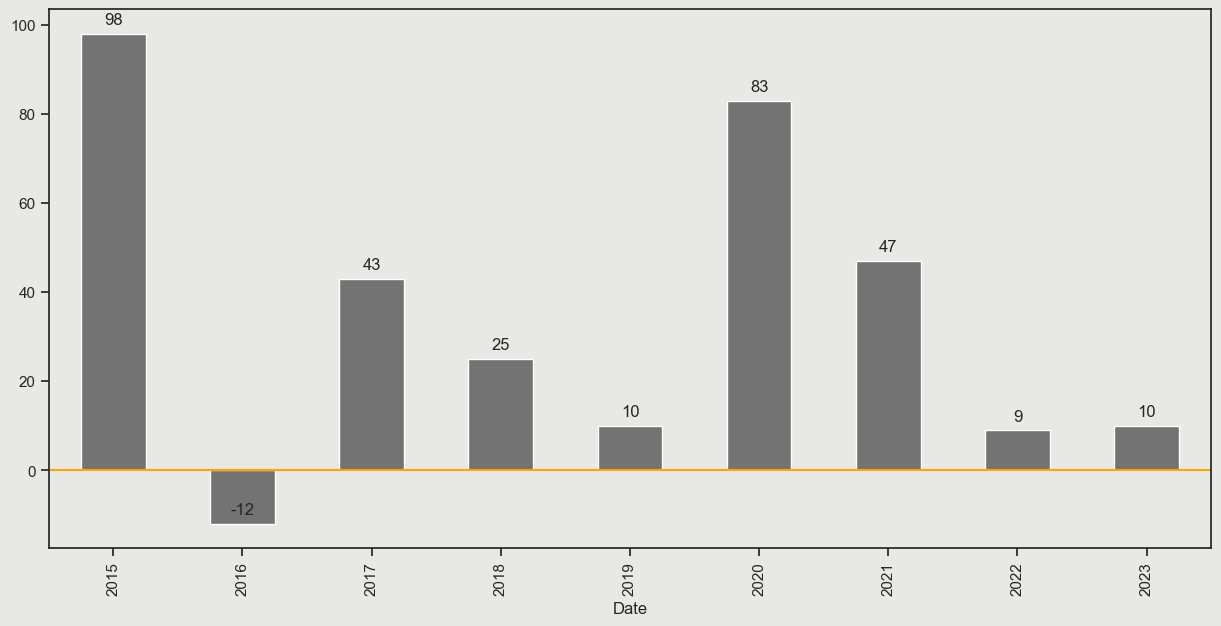

In [15]:
new= df.iloc[1:-1]
ax = new["change"].plot.bar(figsize=(15,7), color="#737373", label="Growth per year")
plt.axhline(y=0,color="orange")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")

plt.show()

- Feature engineering to gather more information about trends and seasons

In [16]:
time_features(data)

,Value,week,month,year,day_of_week,quarter
Date,,,,,,
2020-01-02,75.0875,3,1,2020,Thursday,1
2020-01-03,74.3575,4,1,2020,Friday,1
2020-01-06,74.9500,0,1,2020,Monday,1
2020-01-07,74.5975,1,1,2020,Tuesday,1
2020-01-08,75.7975,2,1,2020,Wednesday,1
...,...,...,...,...,...,...
2024-04-25,169.8900,3,4,2024,Thursday,2
2024-04-26,169.3000,4,4,2024,Friday,2
2024-04-29,173.5000,0,4,2024,Monday,2


# Boxplots
- The use of boxplots is meant to see if there is any relationship between different years and find patterns
- The first exploration is going to be per year

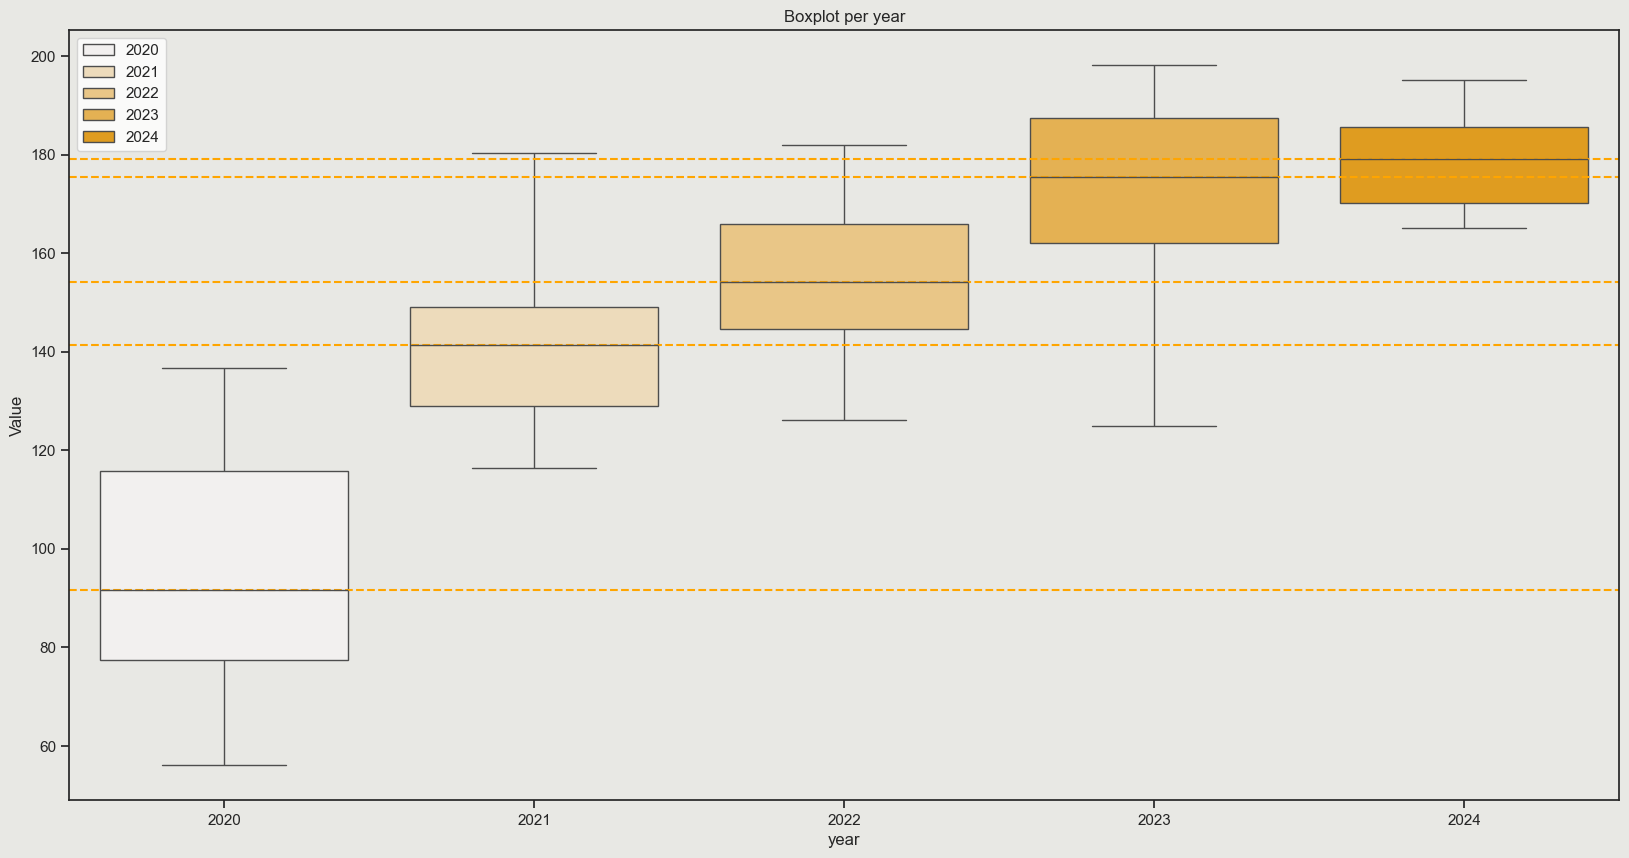

In [108]:
ig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=data, x="year", y="Value", ax=ax, palette="light:orange", hue='year', whis=(0, 100))
ax.set_title('Boxplot per year')
medians = data.groupby('year')['Value'].median()
for year, median_value in medians.items():
    plt.axhline(y=median_value, color='orange', linestyle='--')

plt.gca().set_facecolor("#E8E8E4")
plt.gcf().set_facecolor("#E8E8E4")
plt.legend(loc='best')  
plt.show()

- Visualization of data per month

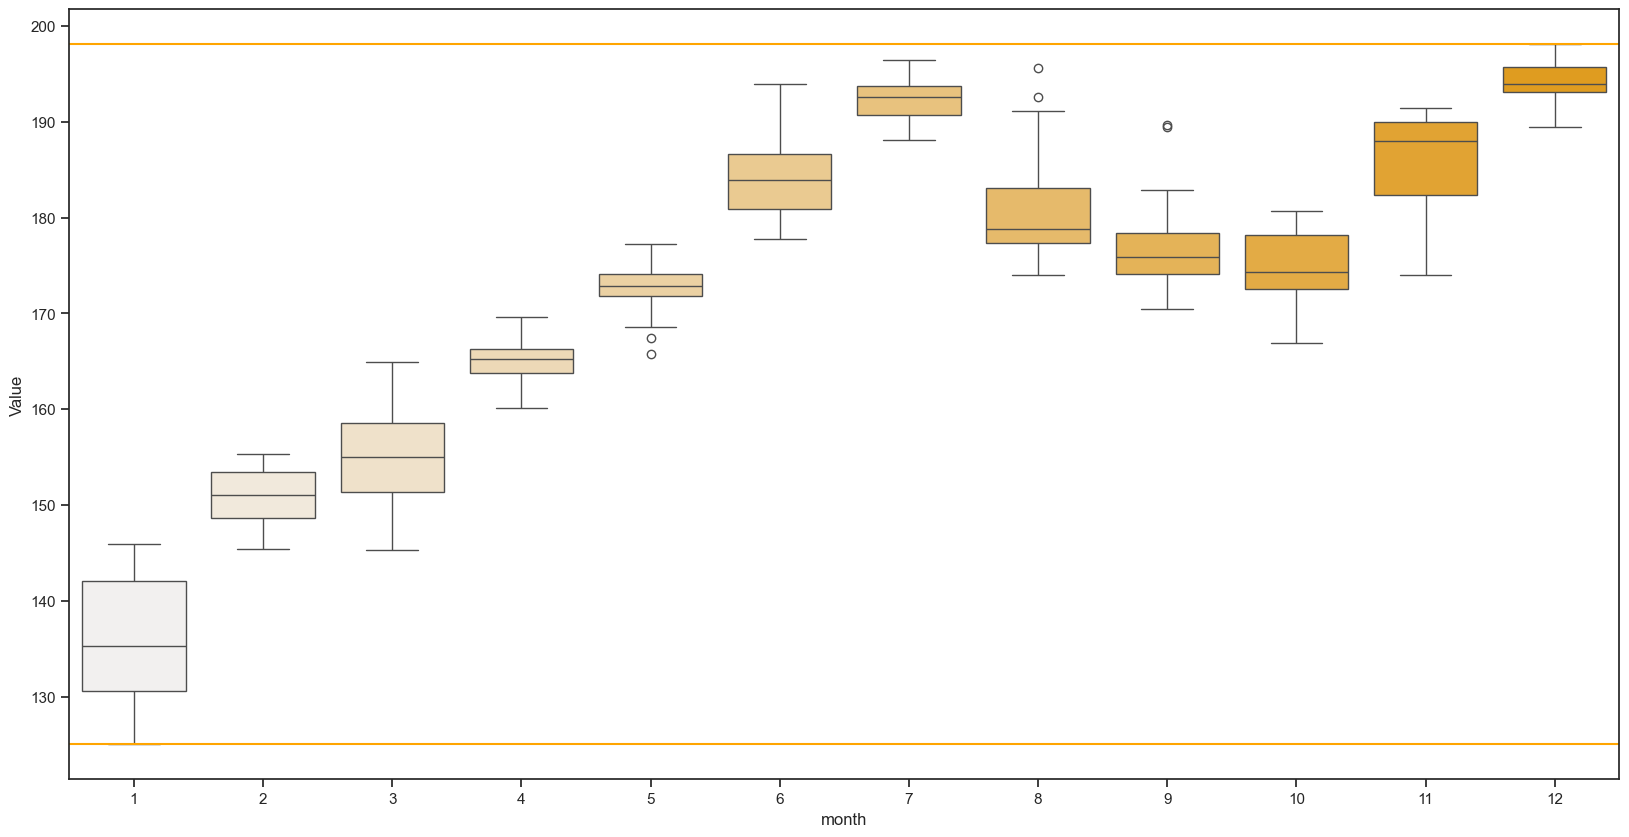

In [109]:
ig,ax= plt.subplots(figsize=(20,10))

sns.boxplot(data.loc['2023'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2023']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2023']["Value"].max(),color='orange')

plt.show()

- There is no match of patterns between different years(2021,2022,2023)

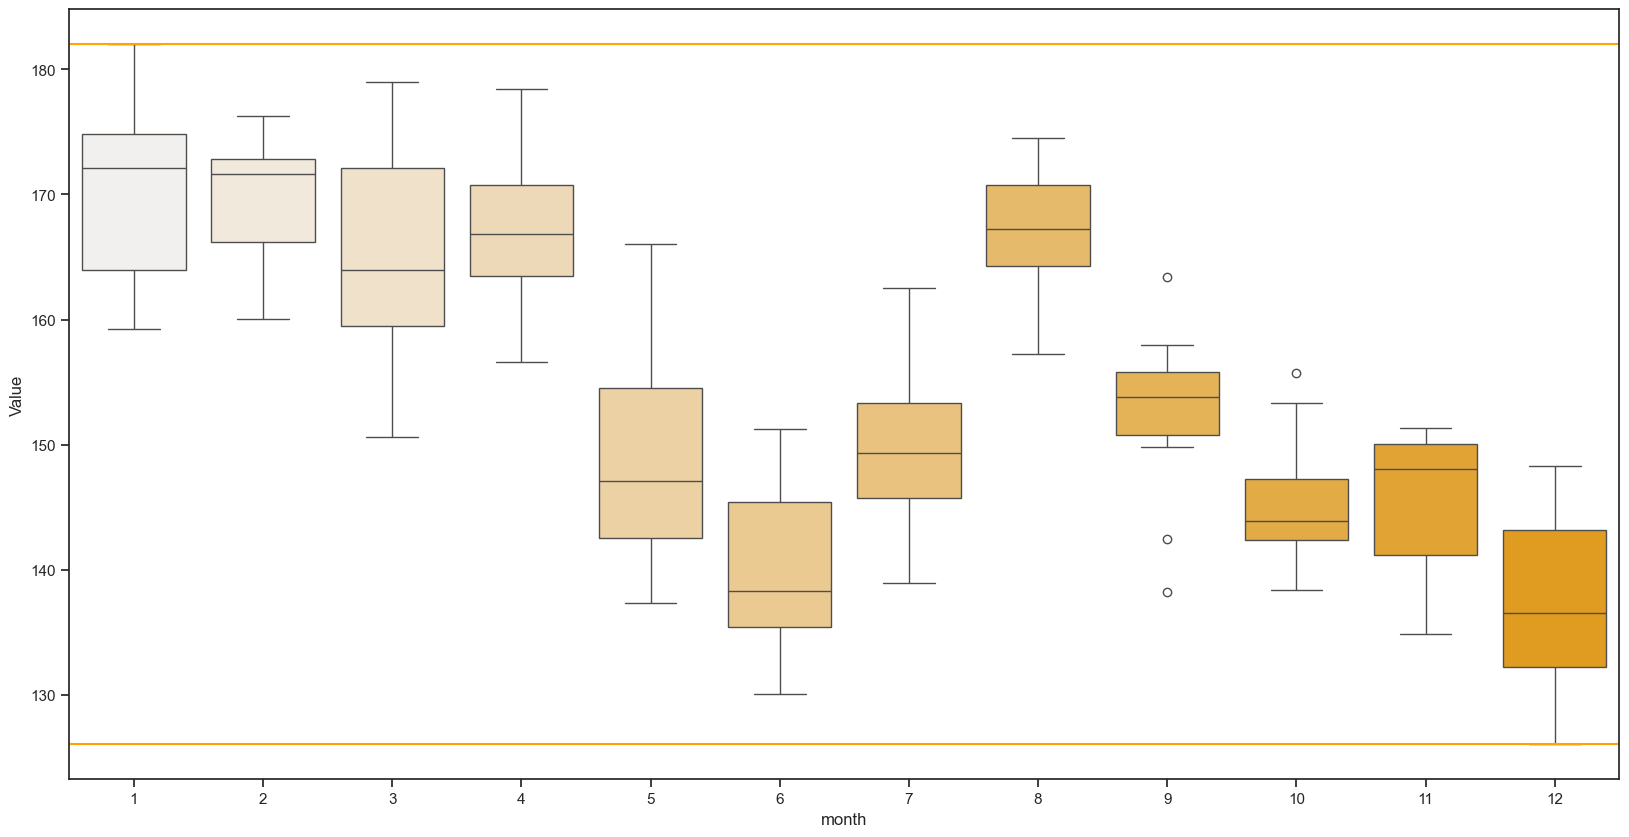

In [110]:
ig,ax= plt.subplots(figsize=(20,10))

sns.boxplot(data.loc['2022'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2022']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2022']["Value"].max(),color='orange')

plt.show()

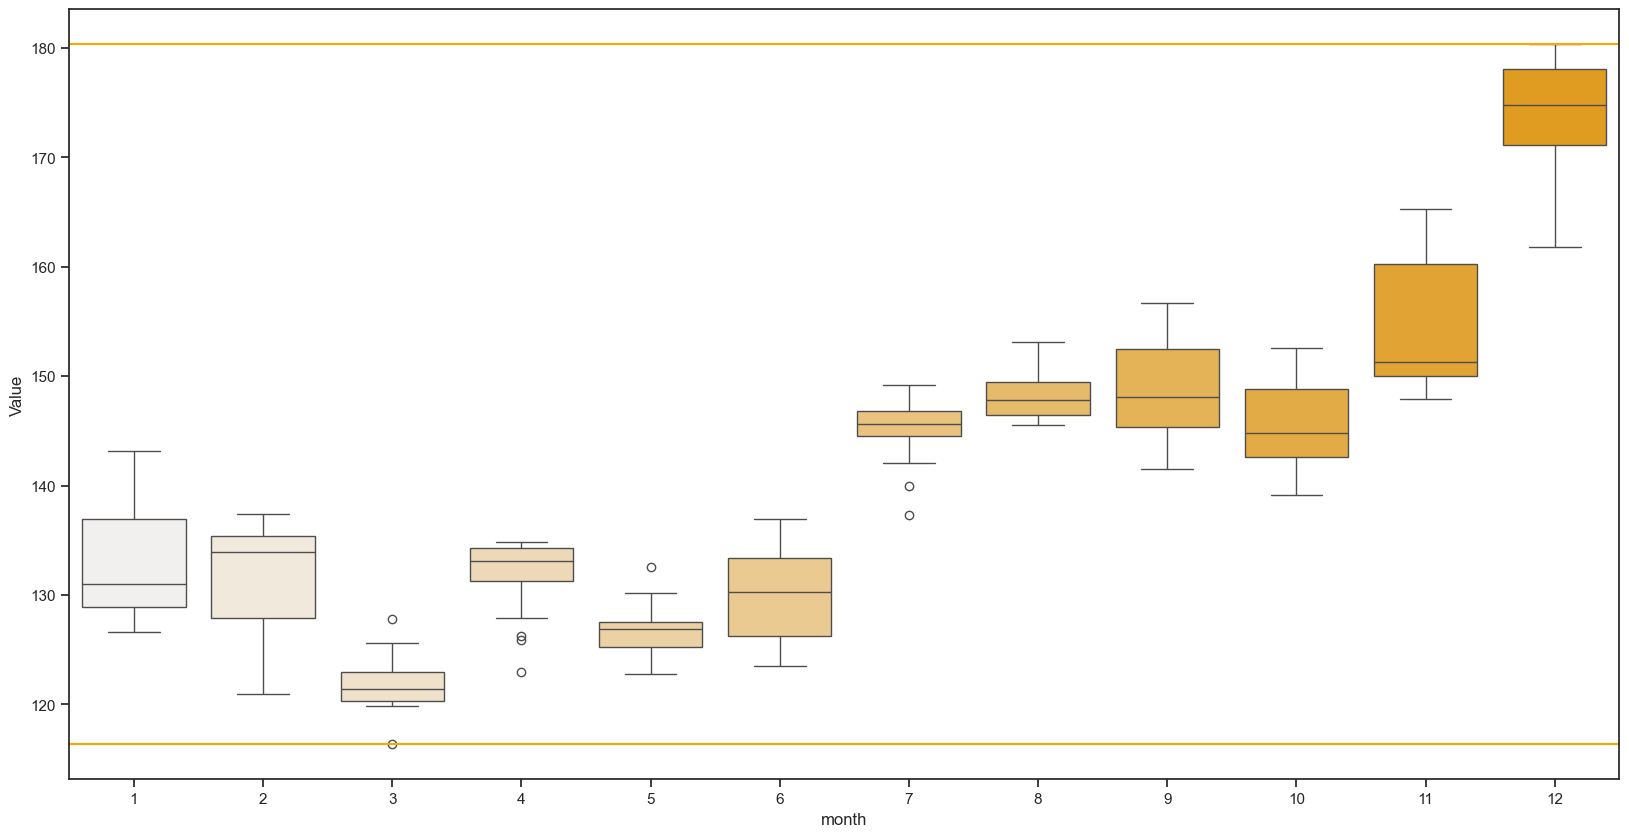

In [111]:
ig,ax= plt.subplots(figsize=(20,10))

sns.boxplot(data.loc['2021'], x='month',y='Value',ax=ax, palette='light:orange',hue='month',legend=False)
plt.axhline(y=data.loc['2021']["Value"].min(),color='orange')
plt.axhline(y=data.loc['2021']["Value"].max(),color='orange')

plt.show()

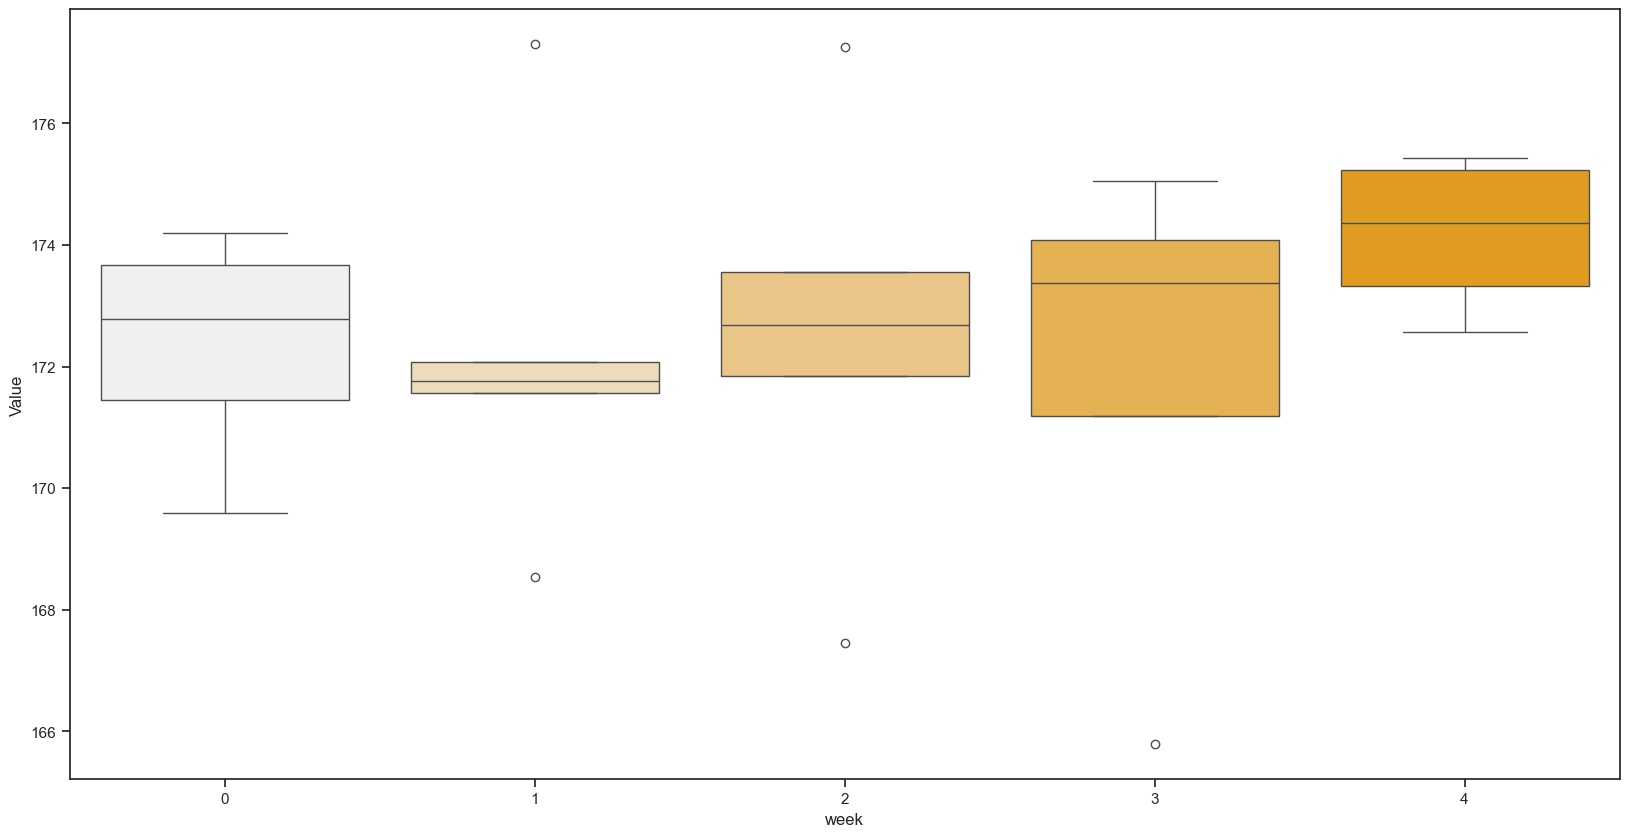

In [112]:
ig,ax= plt.subplots(figsize=(20,10))

sns.boxplot(data.loc['2023-05'], x='week',y='Value',ax=ax, palette='light:orange',hue='week',legend=False)
# plt.axhline(y=data.loc['2023']["Value"].min(),color='orange')
# plt.axhline(y=data.loc['2023']["Value"].max(),color='orange')

plt.show()